# Regression Testing

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Review of sf DataFrame

In [2]:
sf = pd.read_csv('data_files/sf_clean.csv')

In [3]:
sf['hood_district'] = sf['hood_district'].astype(str)

In [4]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        858 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        511 non-null    object 
 8   hood_district  989 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 69.7+ KB


In [5]:
sf.head()

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,in-unit,no-pets,apt,protected,7.0
1,3500,550.0,1.0,1.0,in-unit,both,apt,protected,7.0
2,5100,1300.0,2.0,1.0,in-unit,both,apt,NaN,7.0
3,9000,3500.0,3.0,2.5,in-unit,no-pets,apt,protected,7.0
4,3100,561.0,1.0,1.0,NaN,both,apt,NaN,7.0


In [6]:
sf.describe()

,price,sqft,beds,bath
count,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293
std,1546.222670,474.629798,1.076710,0.562714
min,750.000000,150.000000,0.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000
50%,3300.000000,900.000000,2.000000,1.000000
75%,4242.000000,1200.000000,2.000000,2.000000
max,19000.000000,3500.000000,6.000000,4.000000


In [7]:
sf.corr()

,price,sqft,beds,bath
price,1.000000,0.835834,0.673328,0.691190
sqft,0.835834,1.000000,0.765070,0.720929
beds,0.673328,0.765070,1.000000,0.629331
bath,0.691190,0.720929,0.629331,1.000000


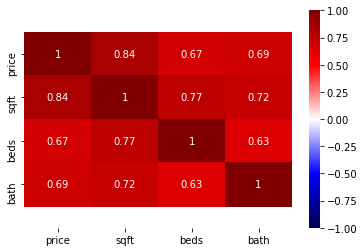

In [8]:
# example of a better corr matrix
sns.heatmap(sf.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(sf.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


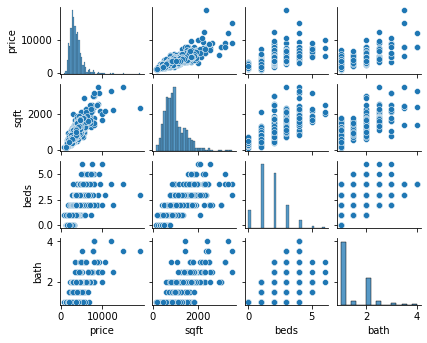

In [9]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(sf, height=1.2, aspect=1.25);

### Regression with sklearn

#### Single independent variable

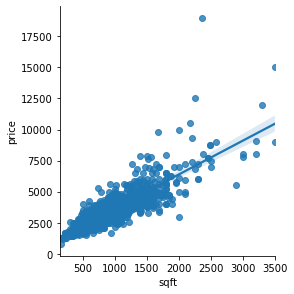

In [10]:
sns.lmplot(x='sqft', y='price', data=sf, height=4);

In [11]:
#Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
# If using just ONE feature, we should apply `.values.reshape(-1, 1)`
X = sf['sqft'].values.reshape(-1, 1)

# Choose the response variable
y = sf['price']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [12]:
lr.score(X,y)

0.6986176510656257

#### Multiple independent variables

In [13]:
sf.head(3)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,in-unit,no-pets,apt,protected,7.0
1,3500,550.0,1.0,1.0,in-unit,both,apt,protected,7.0
2,5100,1300.0,2.0,1.0,in-unit,both,apt,NaN,7.0


In [14]:
model = LinearRegression()

# Construct the data matrix, X, using X1 and X3 as features
# Hint: now that you have more than one feature, you can work with dataframes 
X = sf[['sqft', 'beds', 'bath']]

# Choose the response variable
y = sf['price']

# Fit the model 
model.fit(X, y)

# Score the model (with R^2)
model.score(X, y)

0.7159141709042369

In [15]:
# print out intercept
print("Intercept: ", model.intercept_)

# print out other coefficients
print("Coefficients: ", model.coef_)

Intercept:  666.8587955481671
Coefficients:  [  2.18711602  69.67558797 485.40763346]


#### Model

In [16]:
features = ['sqft', 'beds', 'bath']

model = LinearRegression()

# Construct the data matrix, X, using X1 and X3 as features
# Hint: now that you have more than one feature, you can work with dataframes 
X = sf[features]
X = sm.add_constant(X)

# Choose the response variable
y = sf['price']

# Fit the model 
lm = sm.OLS(y, X)
lm = lm.fit()

# Score the model (with R^2)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     827.4
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.41e-268
Time:                        15:31:02   Log-Likelihood:                -8043.3
No. Observations:                 989   AIC:                         1.609e+04
Df Residuals:                     985   BIC:                         1.611e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        666.8588     71.135      9.375      0.000     527.265     806.452
sqft           2.1871      0.098     22.353      0.000       1.995       2.379
beds          69.6756     38.462      1.812      0.070      -5.800     145.152
bath         485.4076     68.383      7.098      0.000     351.214     619.601
==============================================================================
Omnibus:                      836.353   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64804.091
Skew:                           3.360   Prob(JB):                         0.00
Kurtosis:                      42.082   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Using Dummy Variables

In [17]:
sf.head(3)

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,in-unit,no-pets,apt,protected,7.0
1,3500,550.0,1.0,1.0,in-unit,both,apt,protected,7.0
2,5100,1300.0,2.0,1.0,in-unit,both,apt,NaN,7.0


In [18]:
sf['hood_district'].nunique()

10

In [19]:
pd.get_dummies(sf['hood_district']).head()

,1.0,10.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [20]:
sf.dtypes

price              int64
sqft             float64
beds             float64
bath             float64
laundry           object
pets              object
housing_type      object
parking           object
hood_district     object
dtype: object

In [21]:
sf_dummy = pd.get_dummies(sf)

In [22]:
sf_dummy.head()

,price,sqft,beds,bath,laundry_in-unit,laundry_on-site,pets_both,pets_cats,pets_dogs,pets_no-pets,...,hood_district_1.0,hood_district_10.0,hood_district_2.0,hood_district_3.0,hood_district_4.0,hood_district_5.0,hood_district_6.0,hood_district_7.0,hood_district_8.0,hood_district_9.0
0,6800,1600.0,2.0,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3500,550.0,1.0,1.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5100,1300.0,2.0,1.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,9000,3500.0,3.0,2.5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3100,561.0,1.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = sf_dummy.drop('price',axis=1), sf_dummy['price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=37)

In [25]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [26]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.806
Ridge Regression val R^2: 0.807
Degree 2 polynomial regression val R^2: 0.602


In [27]:
coefs = lm.coef_
columns = sf_dummy.columns[1:]

for pair in zip(columns, coefs):
    print(pair)

('sqft', 1.8553434167787786)
('beds', 200.28086921345306)
('bath', 368.93161717005484)
('laundry_in-unit', 355.7520971923149)
('laundry_on-site', 46.34510484432353)
('pets_both', -116.73722029282673)
('pets_cats', -23.52493668251037)
('pets_dogs', 177.74346396425736)
('pets_no-pets', -37.48130698892047)
('housing_type_apt', 12.979955947048706)
('housing_type_house', -62.78145551813953)
('housing_type_multi', 49.80149957109018)
('parking_off-street', 255.913476892889)
('parking_protected', 127.29989799813356)
('parking_valet', 1504.697498794895)
('hood_district_1.0', -60.27762823834867)
('hood_district_10.0', -796.6973226035591)
('hood_district_2.0', -169.1841654064191)
('hood_district_3.0', -173.43335422054986)
('hood_district_4.0', 61.16810938160543)
('hood_district_5.0', 307.3864790652955)
('hood_district_6.0', 174.27010684569203)
('hood_district_7.0', 360.4493929057114)
('hood_district_8.0', 202.90961904873123)
('hood_district_9.0', 93.4087632218404)
